# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pandas.api.types import is_numeric_dtype

# Import API key
from config import api_key

# Incorporated citipy and openweathermap
from citipy import citipy
import openweathermapy.core as owm

# Output File (CSV)
output = "./output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Prepare search settings
settings = {"units": "imperial", "appid":api_key}

# Store data in dict
weather = {}

# Loop through list of cities and pull current weather data
for num in range( len(cities) ):
    city = cities[num]
    try:
        owm.get_current( cities[num], **settings)
    except:
        print( f"{city} not found. Skipping... ")
    else:
        current = owm.get_current( cities[num], **settings )
        weather[city] = current
        print( f"Processing Record {num + 1} | {cities[num]}" )

Processing Record 1 | hobart
Processing Record 2 | port alfred
Processing Record 3 | oyama
Processing Record 4 | atuona
Processing Record 5 | ushuaia
Processing Record 6 | torbay
Processing Record 7 | ribeira grande
Processing Record 8 | outram
Processing Record 9 | hilo
Processing Record 10 | punta arenas
Processing Record 11 | taksimo
Processing Record 12 | grants pass
Processing Record 13 | pacifica
Processing Record 14 | tura
Processing Record 15 | mar del plata
Processing Record 16 | provideniya
Processing Record 17 | albany
Processing Record 18 | birao
Processing Record 19 | suksun
Processing Record 20 | monteprandone
Processing Record 21 | kodiak
Processing Record 22 | upernavik
Processing Record 23 | geraldton
Processing Record 24 | ngunguru
cockburn harbour not found. Skipping... 
Processing Record 26 | tello
Processing Record 27 | esperance
Processing Record 28 | dikson
Processing Record 29 | rikitea
Processing Record 30 | bobon
Processing Record 31 | westport
Processing Reco

Processing Record 249 | port lincoln
Processing Record 250 | susurluk
Processing Record 251 | erdenet
Processing Record 252 | namibe
Processing Record 253 | pochutla
Processing Record 254 | petropavlovsk-kamchatskiy
Processing Record 255 | new norfolk
Processing Record 256 | san blas
Processing Record 257 | katsuura
Processing Record 258 | songjianghe
Processing Record 259 | betafo
Processing Record 260 | malangwa
Processing Record 261 | irmo
Processing Record 262 | lompoc
Processing Record 263 | brae
korla not found. Skipping... 
Processing Record 265 | roma
tabiauea not found. Skipping... 
Processing Record 267 | ojinaga
Processing Record 268 | rio gallegos
Processing Record 269 | male
Processing Record 270 | cedar city
Processing Record 271 | solnechnyy
Processing Record 272 | robe
Processing Record 273 | ikom
Processing Record 274 | magadan
marcona not found. Skipping... 
Processing Record 276 | kaeo
Processing Record 277 | basco
Processing Record 278 | vidim
Processing Record 279 

Processing Record 497 | gandorhun
Processing Record 498 | kearney
Processing Record 499 | port shepstone
Processing Record 500 | mandalgovi
irbil not found. Skipping... 
Processing Record 502 | mujiayingzi
Processing Record 503 | ribeira brava
Processing Record 504 | mezen
Processing Record 505 | chapais
Processing Record 506 | kitimat
Processing Record 507 | moura
Processing Record 508 | khanpur
Processing Record 509 | lucea
Processing Record 510 | bukama
Processing Record 511 | ketchikan
Processing Record 512 | inhuma
Processing Record 513 | amalapuram
Processing Record 514 | hokitika
Processing Record 515 | southbridge
Processing Record 516 | saquena
Processing Record 517 | zhanaozen
Processing Record 518 | oum hadjer
Processing Record 519 | faya
Processing Record 520 | ostrovnoy
Processing Record 521 | xichang
Processing Record 522 | la orilla
Processing Record 523 | chara
Processing Record 524 | tvoroyri
Processing Record 525 | kabalo
Processing Record 526 | zarate
Processing Reco

In [28]:
weather['hobart']

{'coord': {'lon': 147.33, 'lat': -42.88},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 292.45,
  'pressure': 1010,
  'humidity': 63,
  'temp_min': 290.15,
  'temp_max': 293.71},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 310},
 'clouds': {'all': 75},
 'dt': 1551742995,
 'sys': {'type': 1,
  'id': 9545,
  'message': 0.0068,
  'country': 'AU',
  'sunrise': 1551642849,
  'sunset': 1551689380},
 'id': 2163355,
 'name': 'Hobart',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Read data and reshape as DataFrame
data = pd.DataFrame( weather )
df = data.T
df= df.reset_index()

In [18]:
# Select columns to develop
df_weather = df[['name', 'clouds', 'sys', 'dt', 'main', 'coord', 'wind']]
df_weather = df_weather.rename( columns={'main': 'Humidity', 'coord': 'Lat'} )
df_weather['Lng'] = df['coord']
df_weather['Max Temp'] = df['main']

In [19]:
# Re-format columns
for index,row in df_weather.iterrows():
    row['clouds'] = row['clouds']['all']
    row['sys'] = row['sys']['country']
    row['Humidity'] = row['Humidity']['humidity']
    row['Lat'] = row['Lat']['lat']
    row['wind'] = row['wind']['speed']
    row['Lng'] = row['Lng']['lon']
    row['Max Temp'] = row['Max Temp']['temp_max']

# Reorder and rename columns
df_weather = df_weather[['name','clouds', 'sys','dt','Humidity','Lat','Lng','Max Temp','wind']]
df_weather = df_weather.rename( columns={'name': 'City',
                           'clouds': 'Cloudiness',
                           'sys': 'Country',
                           'dt': 'Date',
                           'Humidity': 'Humidity',
                           'Lat': 'Lat',
                           'Lng': 'Lng',
                           'Max Temp': 'Max Temp',
                           'wind': 'Wind Speed'})

In [20]:
df_weather.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [21]:
# Display top of DataFrame
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,75,AU,1551742995,63,-42.88,147.33,293.71,3.1
1,Port Alfred,44,ZA,1551743067,93,-33.59,26.89,292.04,2.68
2,Oyama,20,JP,1551743167,75,36.31,139.8,285.93,3.1
3,Atuona,36,PF,1551743207,100,-9.8,-139.03,300.717,6.56
4,Ushuaia,75,AR,1551740400,57,-54.81,-68.31,283.15,5.1


In [22]:
# Save DataFrame to csv file in current directory
df_weather.to_csv( output )

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

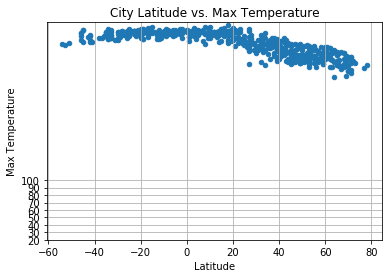

In [23]:
# Create DataFrame to build scatter plot from
lat_temp = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Max Temperature': df_weather['Max Temp'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_temp.plot( x="Latitude",
               y="Max Temperature",
               kind="scatter",
               title="City Latitude vs. Max Temperature",
               grid=True,
               xticks=range(-60,90,20),
               yticks=range(20,110,10))

# Save figure as .png
plt.savefig( "lat_temp_plot.png", bbox='tight')

#### Latitude vs. Humidity Plot

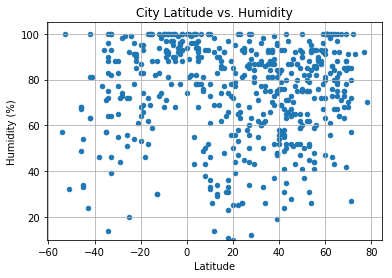

In [24]:
# Create DataFrame to build scatter plot from
lat_hum = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Humidity (%)': df_weather['Humidity'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_hum.plot( x="Latitude",
               y="Humidity (%)",
               kind="scatter",
               title="City Latitude vs. Humidity",
               grid=True,
               ylim=(10,105),
               xticks=range(-60,90,20),
               yticks=range(20,110,20))

plt.savefig( "lat_hum_plot.png", bbox='tight')

#### Latitude vs. Cloudiness Plot

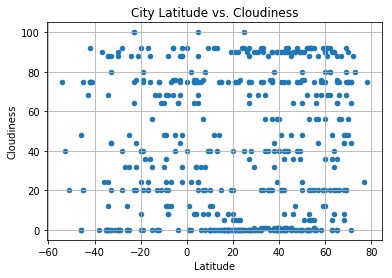

In [25]:
# Create DataFrame to build scatter plot from
lat_cloud = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Cloudiness': df_weather['Cloudiness'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_cloud.plot( x="Latitude",
               y="Cloudiness",
               kind="scatter",
               title="City Latitude vs. Cloudiness",
               grid=True,
               ylim=(-5,105),
               xticks=range(-60,90,20),
               yticks=range(0,110,20))

plt.savefig( "lat_cloud_plot.png", bbox='tight')

#### Latitude vs. Wind Speed Plot

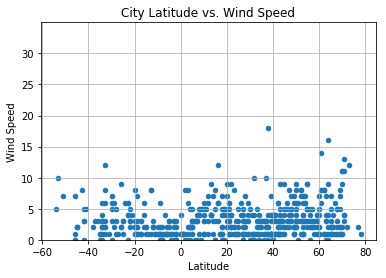

In [26]:
# Create DataFrame to build scatter plot from
lat_wind = pd.DataFrame({'Latitude': df_weather['Lat'].astype('int64'),
                        'Wind Speed': df_weather['Wind Speed'].astype('int64')})

# Construct scatter plot (Lat v. Temp)
lat_wind.plot( x="Latitude",
               y="Wind Speed",
               kind="scatter",
               title="City Latitude vs. Wind Speed",
               grid=True,
               ylim=(0,35),
               xticks=range(-60,90,20),
               yticks=range(0,35,5))

plt.savefig( "lat_wind_plot.png", bbox='tight')